# XGBOOST K-Fold Classifier
With 1H Timeframe BTCUSDT Data from 2015 till end of 2019

In [1]:
import pandas as pd
import numpy as np
import os
# add global to sys
import sys
sys.path.insert(0, 'C:/Users/Lukasz/Documents/python/global_input')

In [2]:
from packages.FileHandler import FileExtractor
path = 'C:/Users/Lukasz/Documents/python/global_input/data/aggregated'
prefix = "BTCUSDT"
timeframes = ["1H"]
start_date = "2015-01-01 00:00:00"
data = FileExtractor(path, prefix, timeframes, start_date)
df = data.data_dict[timeframes[0]]

# Add TAlib Features and 10 lags per Feature

In [3]:
from packages.addFeatures import add_features, add_lags
data = add_features(df)
# lag features
lags = 10
data, cols = add_lags(data, lags)

# Declare feature vector X and target vector y

In [4]:
X = data.drop("direction", axis=1)
y = data["direction"]

In [5]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)
mu, std = X_train.mean(), X_train.std()
X_train = (X_train - mu) / std # normalized train data (using train moments)
X_test = (X_test - mu) / std

In [15]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



Accuracy: 54.11% (0.81%)


In [16]:
# make predictions on test data

y_pred = model.predict(X_test)

NotFittedError: need to call fit or load_model beforehand

In [9]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.5280


In [10]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
            num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
print(xgb_cv)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.601836       0.001764       0.568322      0.002361
1         0.614267       0.001927       0.576108      0.002326
2         0.619696       0.001737       0.578722      0.003590
3         0.623559       0.001413       0.581204      0.003470
4         0.626075       0.002494       0.582548      0.004345
5         0.629133       0.001761       0.583136      0.004098
6         0.632309       0.001806       0.584659      0.004576
7         0.634725       0.001377       0.584832      0.004371
8         0.637855       0.001646       0.585441      0.005090
9         0.640386       0.002043       0.585710      0.004784
10        0.642981       0.001181       0.586470      0.005230
11        0.645213       0.001248       0.586252      0.005555
12        0.647375       0.001395       0.586521      0.005405
13        0.649679       0.001333       0.586828      0.005169
14        0.651795       0.001260       0.587001      0

NameError: name 'plt' is not defined

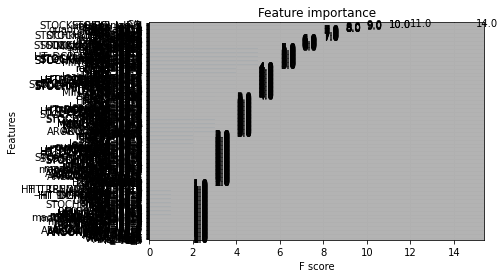

In [13]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (160, 120))
plt.show()

ValueError: tree must be Booster, XGBModel or dict instance